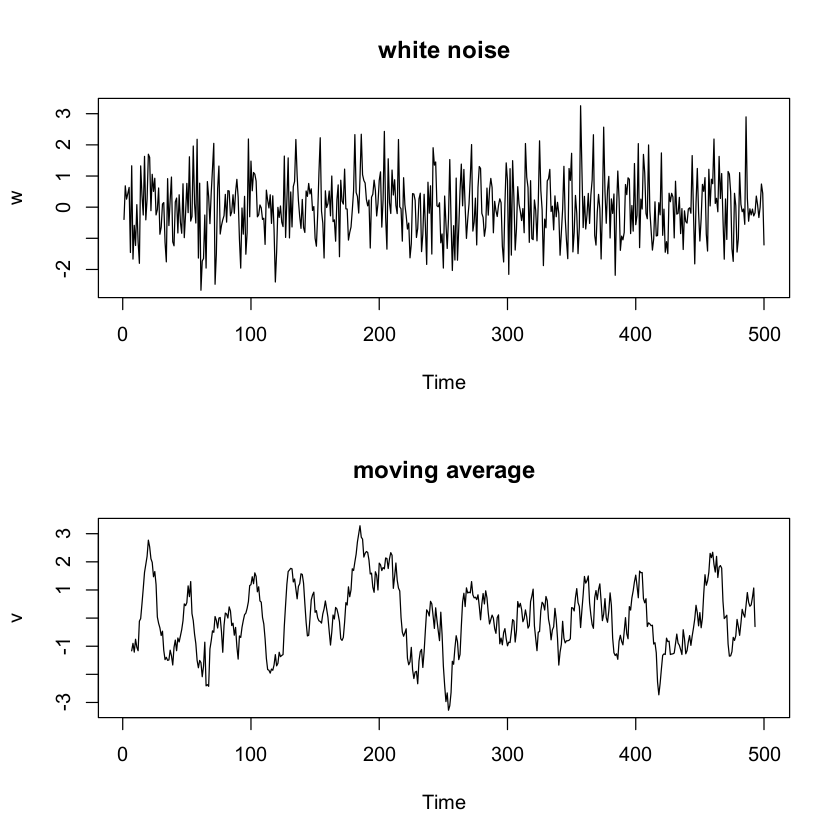

In [51]:
w = rnorm(500,0,1)
v = filter(w, sides=2, rep(1/3,14))
par(mfrow=c(2,1))
plot.ts(w, main="white noise")
plot.ts(v, main="moving average")

$xt = x_t-1 − .9x_t−2 + w_t$

Autoregression

In [52]:
# The above equation represents autoregression which predicts the current value base on as a funciton fo the past to2wo values of the series and hence the term autoregression

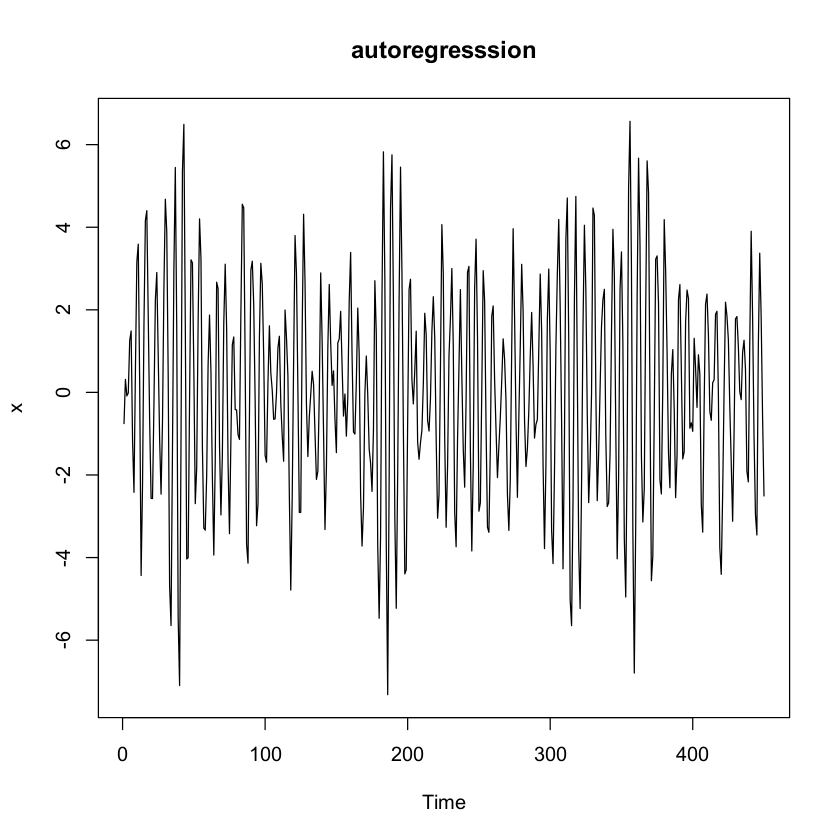

In [53]:
# following is a simulated data

w =  rnorm(500,0,1)
x = filter(w, filter=c(1,-.9),method="recursive")[-(1:50)]
plot.ts(x, main="autoregresssion")

$x_t = δ + x_t−1 + w_t$

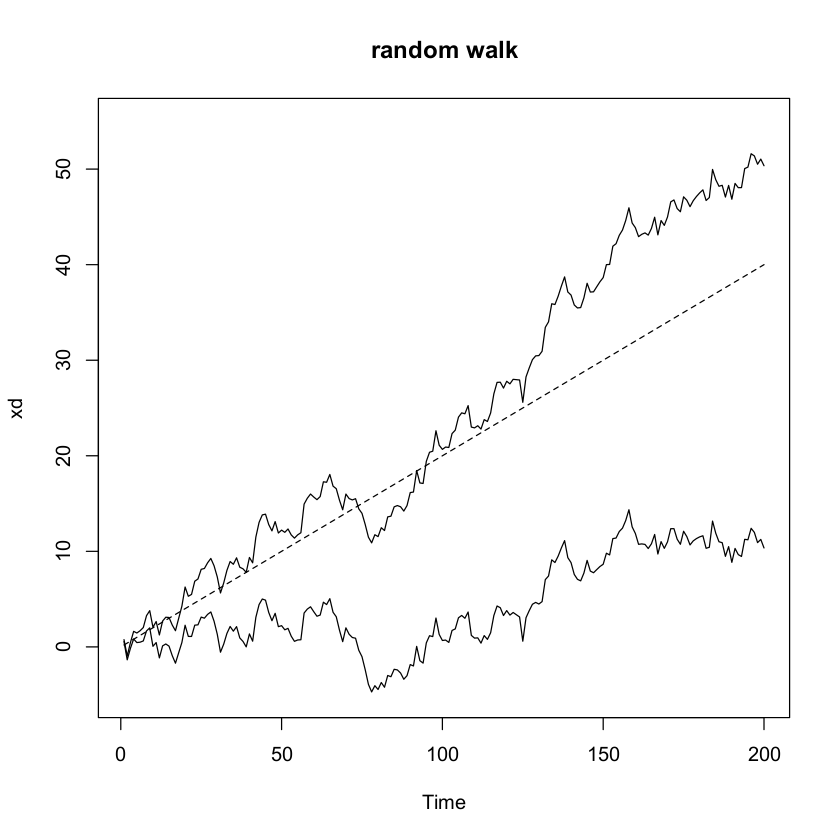

In [54]:
#The above signifies random walk with drift where delta is the drift and the random movement is defined by wt

set.seed(154)
w = rnorm(200,0,1)
x = cumsum(w)
wd = w + .2
xd = cumsum(wd)
plot.ts(xd, ylim=c(-5,55), main="random walk")
lines(x)
lines(.2*(1:200), lty="dashed")

Warning message in par(mfrow = c(3, 1), width = 14, fig = c(0, 1, 0, 0.6), cex.main = 2):
“"width" is not a graphical parameter”


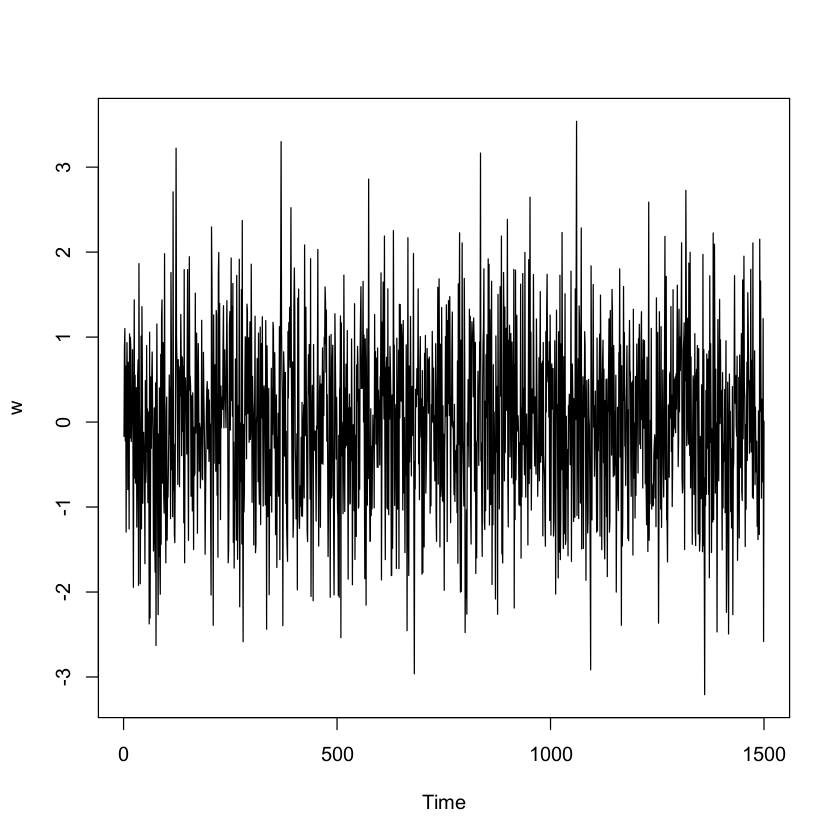

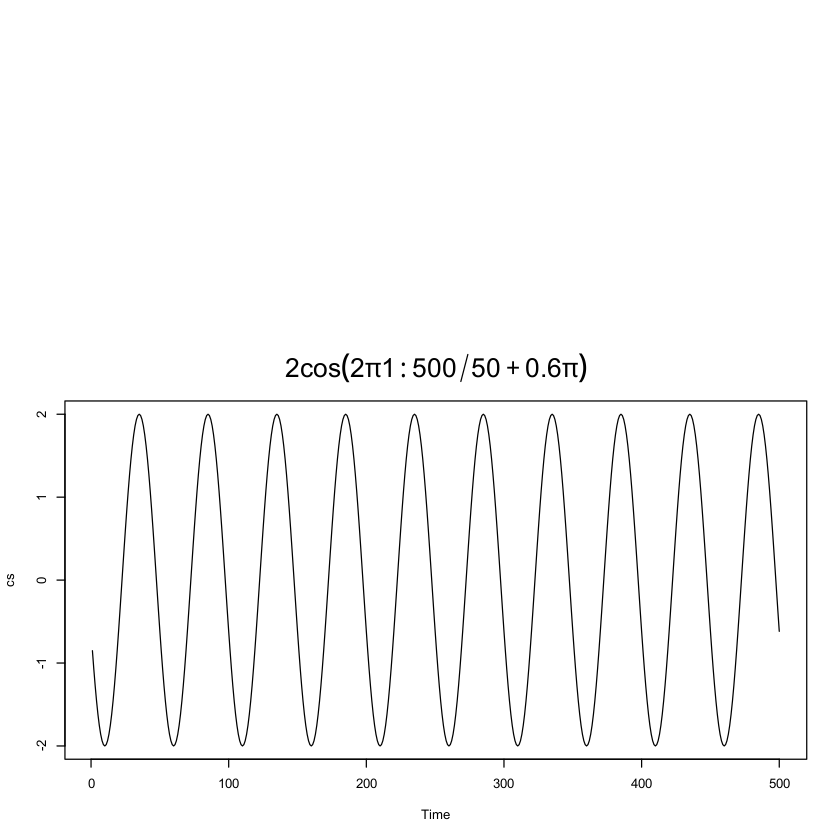

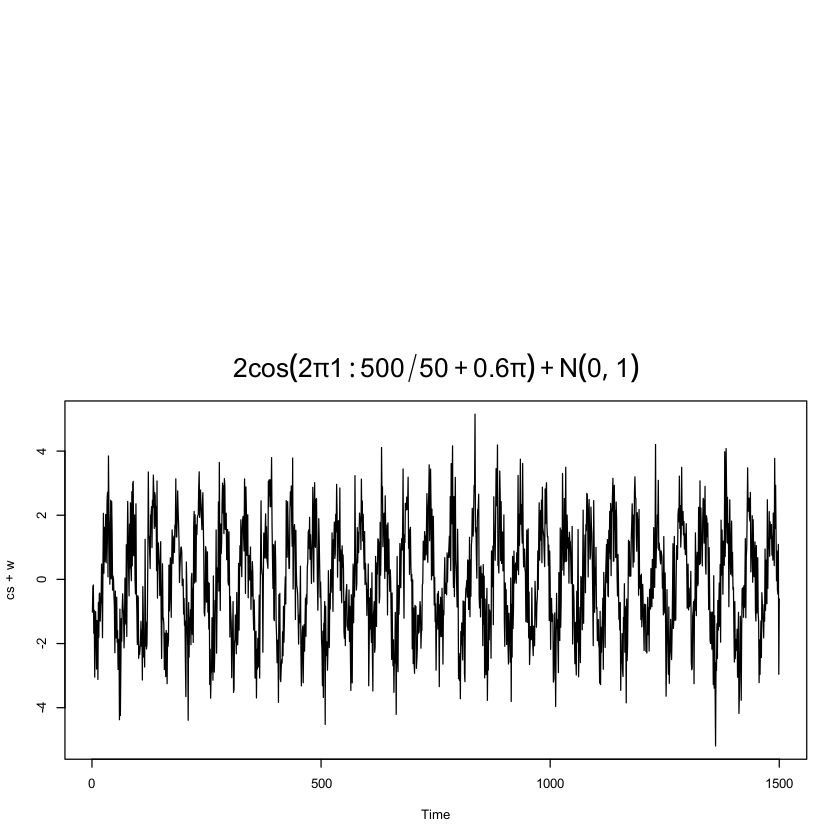

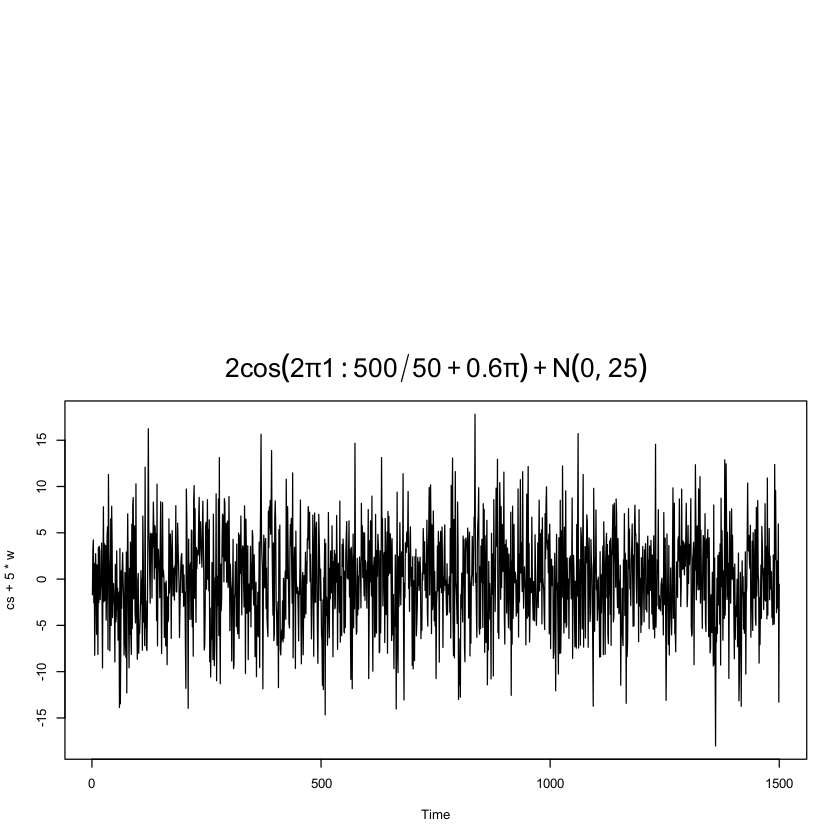

In [55]:
cs = 2*cos(2*pi*1:500/50 + .6*pi)
w  = rnorm(1500,0,1)
plot.ts(w)
par(mfrow=c(3,1),width=14,fig=c(0, 1, 0, 0.6), cex.main=2)
plot.ts(cs, main = expression(cs = 2*cos(2*pi*1:500/50 + .6*pi)))
plot.ts(cs+w, main=expression(cs = 2*cos(2*pi*1:500/50 + .6*pi) + N(0,1)))
plot.ts(cs+5*w, main=expression(cs = 2*cos(2*pi*1:500/50 + .6*pi) + N(0,25)))

ACF

In [57]:
acf

function (x, lag.max = NULL, type = c("correlation", "covariance", 
    "partial"), plot = TRUE, na.action = na.fail, demean = TRUE, 
    ...) 
{
    type <- match.arg(type)
    if (type == "partial") {
        m <- match.call()
        m[[1L]] <- quote(stats::pacf)
        m$type <- NULL
        return(eval(m, parent.frame()))
    }
    series <- deparse1(substitute(x))
    x <- na.action(as.ts(x))
    x.freq <- frequency(x)
    x <- as.matrix(x)
    if (!is.numeric(x)) 
        stop("'x' must be numeric")
    sampleT <- as.integer(nrow(x))
    nser <- as.integer(ncol(x))
    if (is.na(sampleT) || is.na(nser)) 
        stop("'sampleT' and 'nser' must be integer")
    if (is.null(lag.max)) 
        lag.max <- floor(10 * (log10(sampleT) - log10(nser)))
    lag.max <- as.integer(min(lag.max, sampleT - 1L))
    if (is.na(lag.max) || lag.max < 0) 
        stop("'lag.max' must be at least 0")
    if (demean) 
        x <- sweep(x, 2, colMeans(x, na.rm = TRUE), check.margin = FALSE)
    lag <- matrix(1, nser, nser)
    lag[lower.tri(lag)] <- -1
    acf <- .Call(C_acf, x, lag.max, type == "correlation")
    lag <- outer(0:lag.max, lag/x.freq)
    acf.out <- structure(list(acf = acf, type = type, n.used = sampleT, 
        lag = lag, series = series, snames = colnames(x)), class = "acf")
    if (plot) {
        plot.acf(acf.out, ...)
        invisible(acf.out)
    }
    else acf.out
}
<bytecode: 0x5614832e6e30>
<environment: namespace:stats>